# KNN Classifier
### About this dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<br>kaggle: [diabetes.csv](https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed/data?select=diabetes.csv)

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
sns.set_theme()
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('diabetes.csv')

In [108]:
df.shape

(768, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA
as we oberverd above, there is no categorical data or text data present in our dataset. so we will treat all data as numerical data.<br>
we will do following operations on dataset:
* Missing values
* Distribution of Numerical values
* Outliers
* Relationship between independent and dependent 



In [111]:
independent_feature = [feature for feature in df.columns if feature != 'Outcome']
independent_feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Missing Values

In [112]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
# checking for 0 in independent features
df[df[independent_feature]==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

There are no null values present in our dataset. there are no **Null** values in dataset. but dataset conatin 0 in some fields which might not good. we will replace that 0 with NaN so we can fill meaningful values there.

In [114]:
# making copy of dataset, so any changes wont affect original dataset
df_copy = df.copy()

# replacing 0 with Null
df_copy[independent_feature] = df_copy[independent_feature].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [115]:
feature_na = [feature for feature in dependent_feature if df_copy[feature].isnull().sum()>1]

#### Lets Analyse How this Null Values important for Outcome

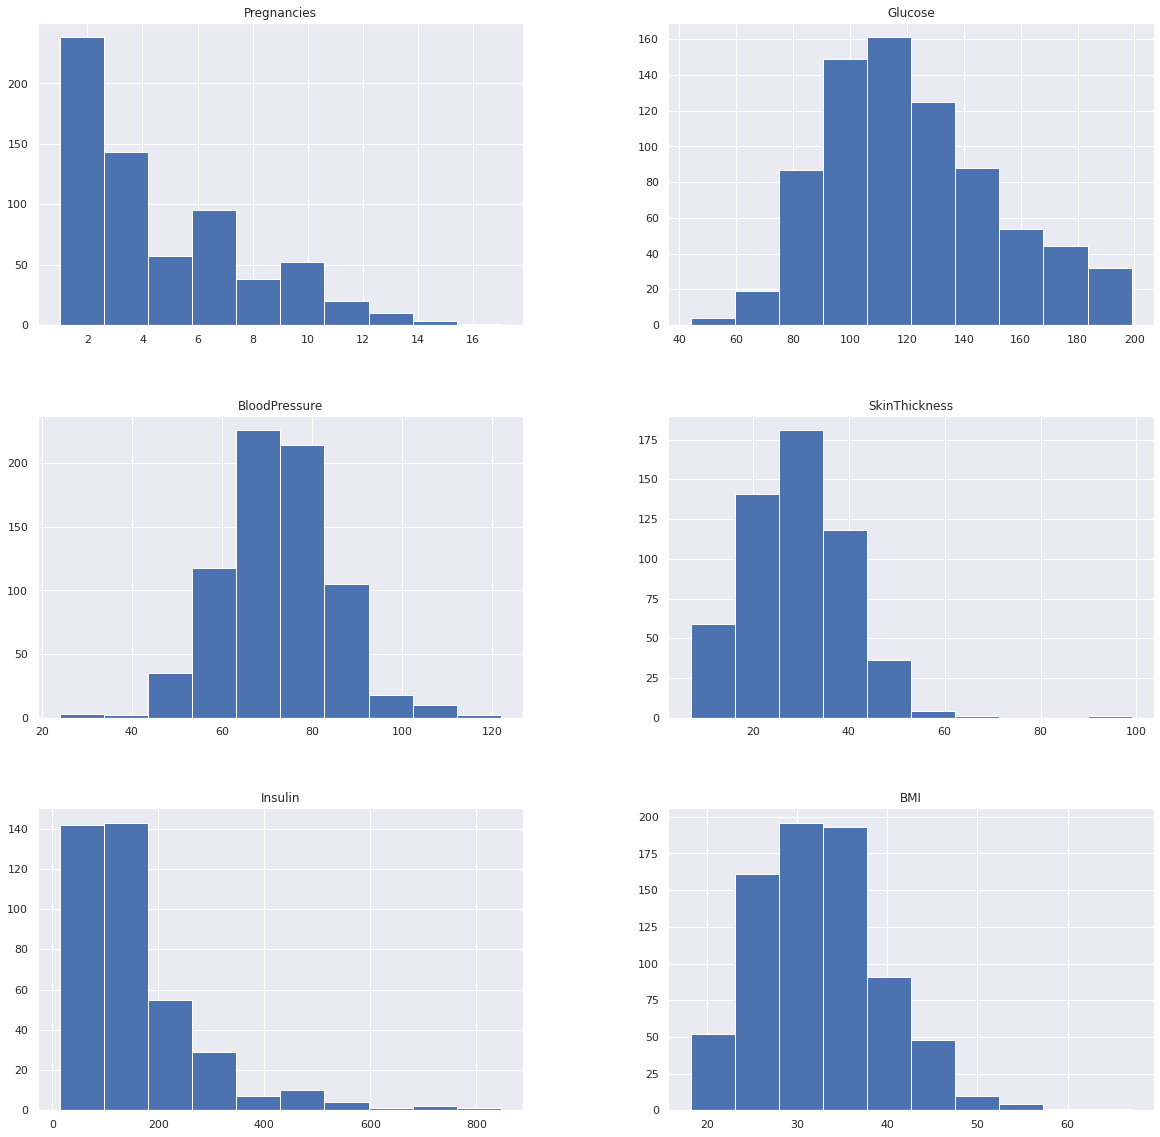

In [116]:
df_copy[feature_na].hist(figsize=(20,20));

We can use median to deal with Null values

In [117]:
df_copy[feature_na] = df_copy[feature_na].fillna(df_copy[feature_na].median())
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


#### Plotting after NaN removal

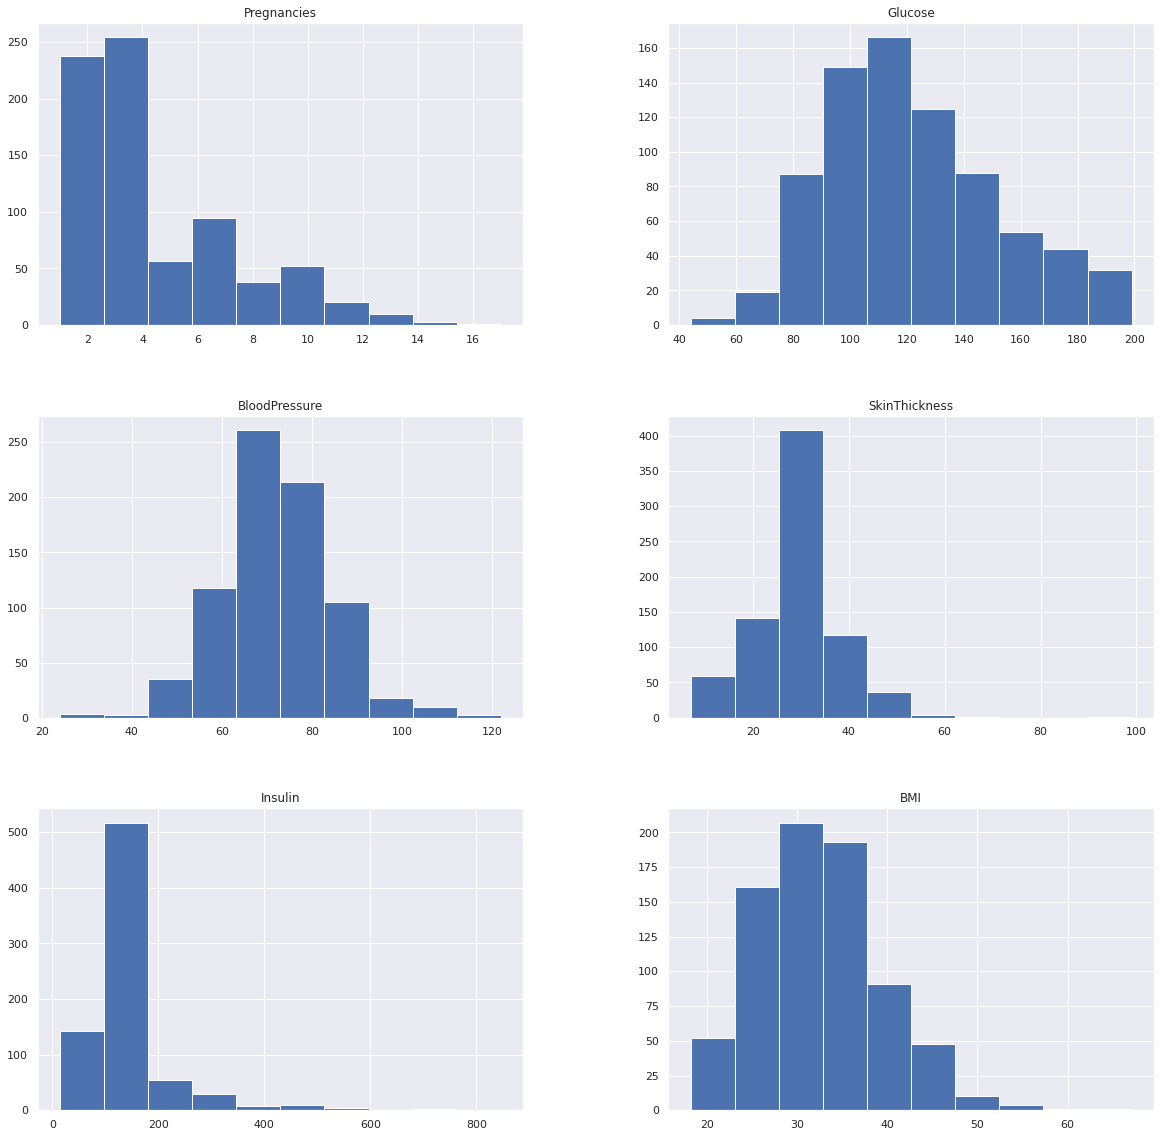

In [118]:
df_copy[feature_na].hist(figsize=(20,20));

### Checking Balance of Dataset

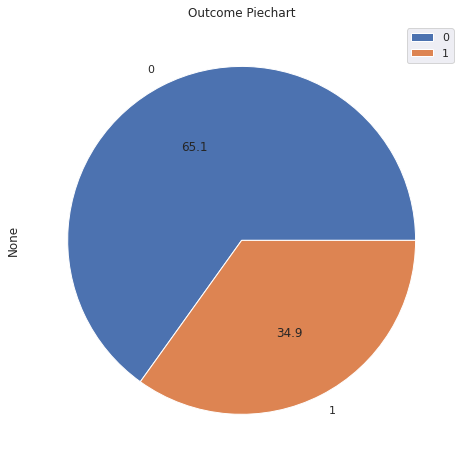

In [129]:
df_copy.value_counts('Outcome').plot.pie(figsize=(8,8), autopct='%.1f');
plt.legend();
plt.title('Outcome Piechart');

From above pie we can say, Dataset conatin more 0 value output than 1 value. i.e. dataset biased towards non Diabatic

### Outliers in dataset

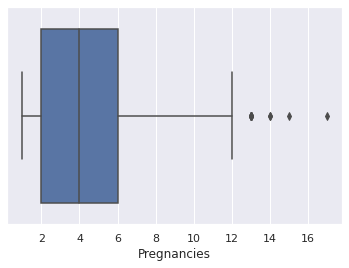

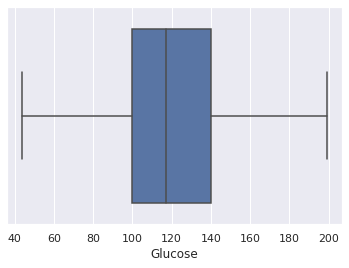

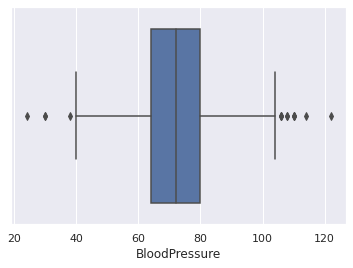

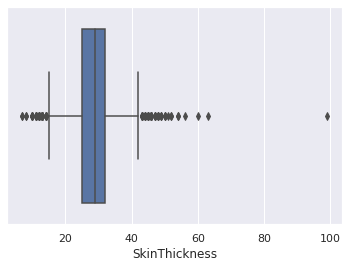

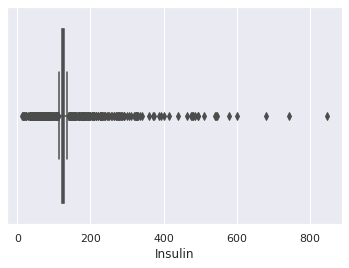

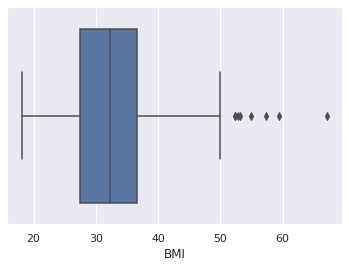

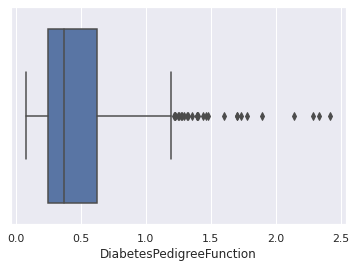

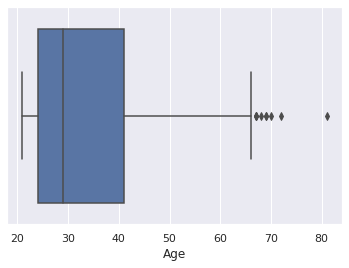

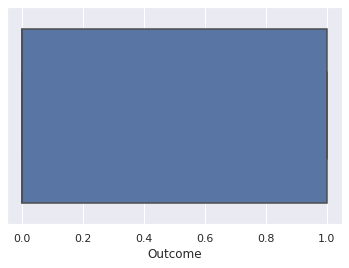

In [133]:
for i in list(df_copy.columns):
    data = df_copy.copy()
    sns.boxplot(data[i])
    plt.show()

we can observe,There are outliers present in our dataset

In [134]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3-Q1
# lower_lim = Q1-1.5*IQR
# upper_lim = Q3+1.5*IQR
# feature_outliers = [feature for feature in dependent_feature if (any(df[feature]<lower_lim[feature]) or any(df[i]>upper_lim[feature]))]
# feature_outliers

## Visulizating and finding correlation

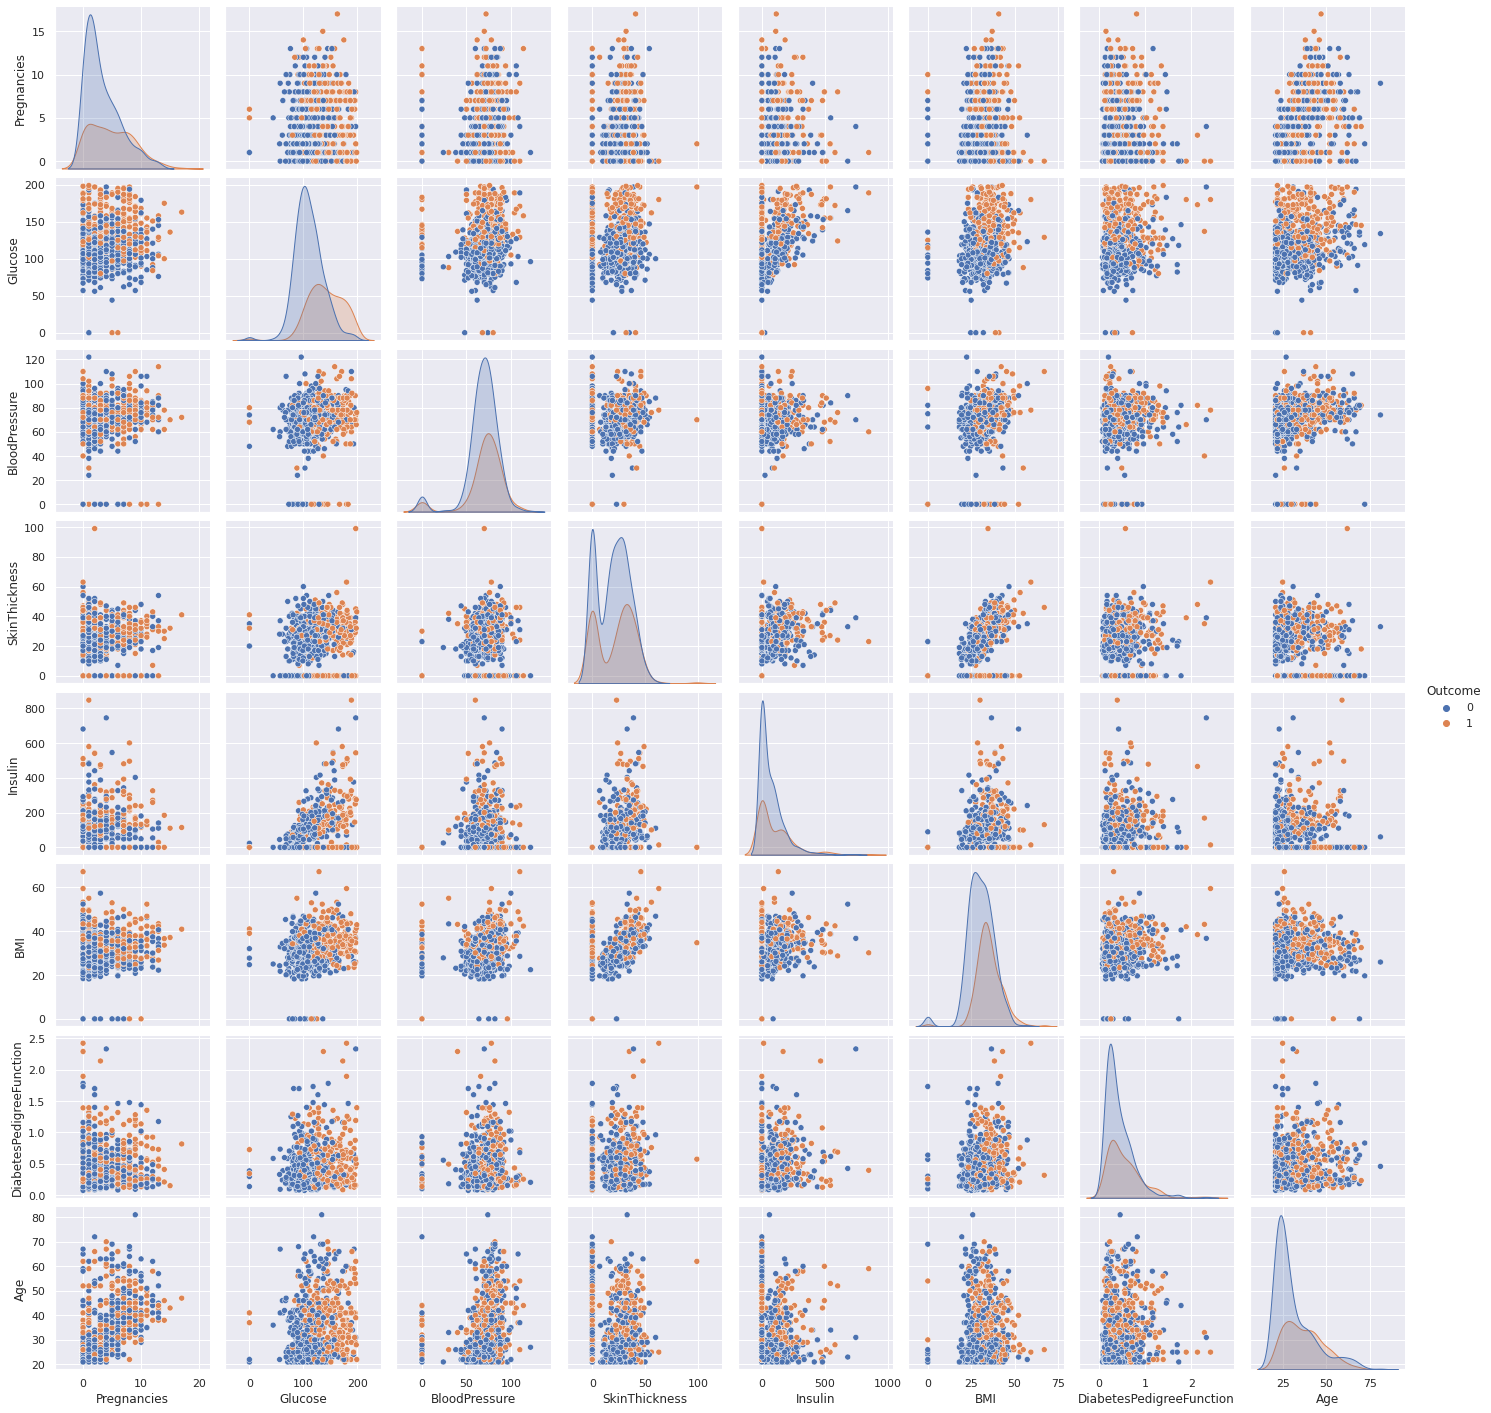

In [72]:
data=df.copy()
sns.pairplot(data=data, hue='Outcome')

We will try to find correlation between features using pearson's correlation coeffient
#### Correlation before processing data

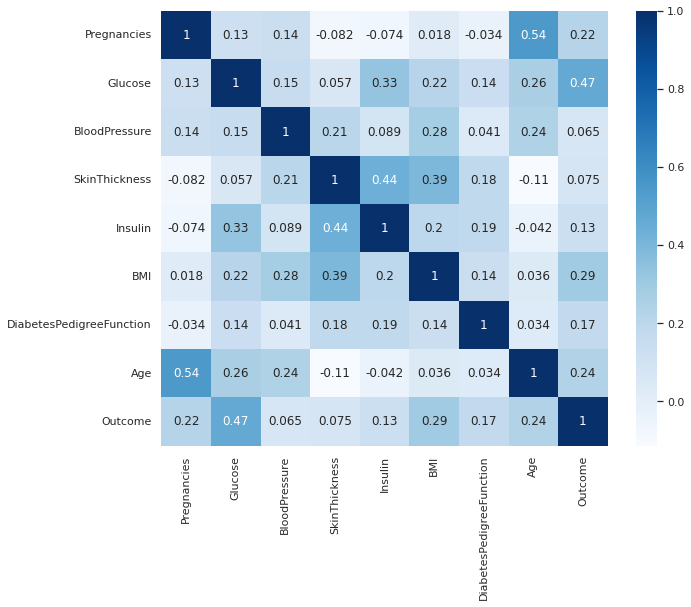

In [142]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

#### Correlation after processing data

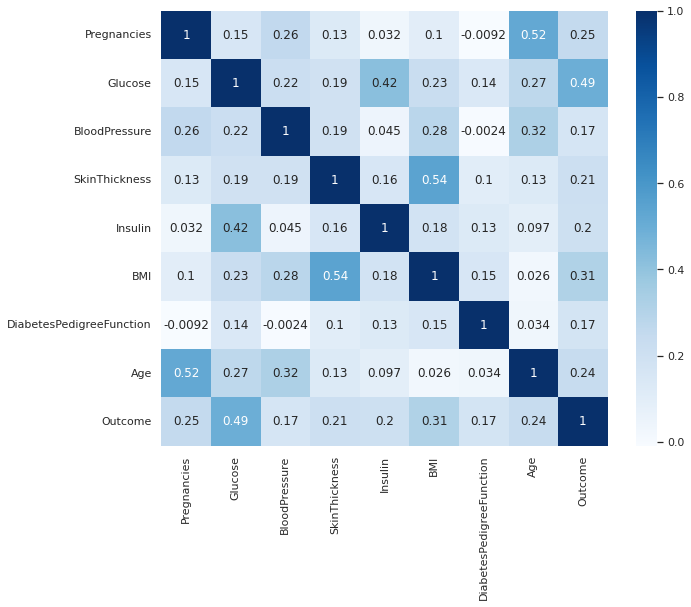

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), annot=True, cmap='Blues');

## Scaling Data
before we go for scaling, we will separate independent and dependent data. <br>
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:<br>
<img src="https://bit.ly/39QlL3g" align="center" border="0" alt=" z=(x_{k} - \mu) / \sigma " width="150" height="25" />

In [144]:
X = df_copy[independent_feature]
y = df_copy[['Outcome']]

In [146]:
scalar = StandardScaler()
sc_X = pd.DataFrame(scalar.fit_transform(X),columns=independent_feature)

In [150]:
sc_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.529395,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-1.149280,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.200864,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-1.149280,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-0.142075,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


## Model Evaluation and tuning
first we will split model into train an test

In [187]:
X_train,X_test, y_train, y_test=  train_test_split(sc_X, y, test_size=0.2, random_state=55)

for finding best k value for model. We will create and check model with k values between 3 to 25

In [188]:
test_score = {}
train_score = {}

for i in range(3, 26):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        train_score[i] = knn.score(X_train, y_train)
        test_score[i] = knn.score(X_test, y_test)

Plotting graph for visualization

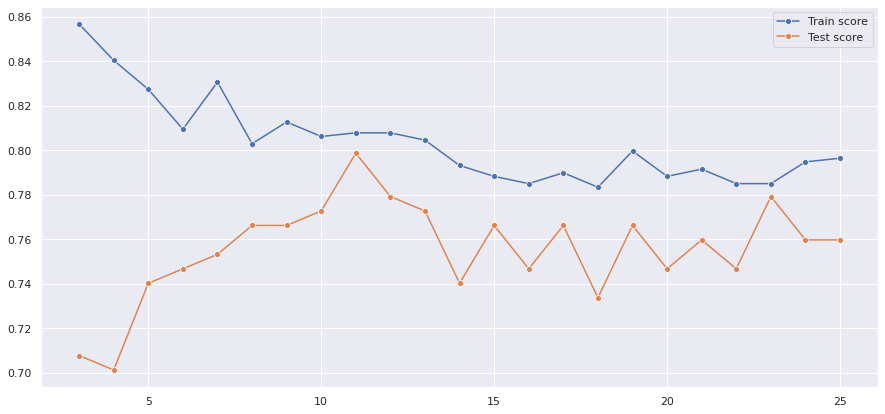

In [189]:
plt.figure(figsize=(15,7))
sns.lineplot(list(train_score.keys()), list(train_score.values()), marker='o', label='Train score')
sns.lineplot(list(test_score.keys()), list(test_score.values()), marker='o', label='Test score')
plt.show()

We are getting high score on k=11. hence 11 will be used for final model

In [195]:
# making model
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
print(f'Model score : {round(model.score(X_test, y_test)*100,2)}%')

Model score : 79.87%


## Model Performace Analysis
 ### Confusion Matrix

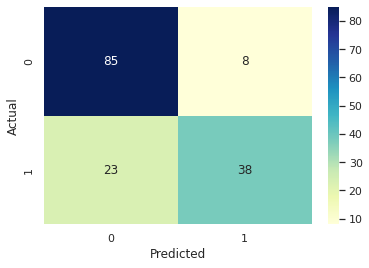

In [204]:
y_pred = model.predict(X_test)
# heatmap for better visualization
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='YlGnBu');
plt.ylabel('Actual')
plt.xlabel('Predicted');

### Classification Reports

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        93
           1       0.83      0.62      0.71        61

    accuracy                           0.80       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.80      0.80      0.79       154

